In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
file_path = './energy_demand_hourly_brazil.csv'
data = pd.read_csv(file_path)
data.head()

,index,hourly_demand
0,2000-01-01 00:00:00,34673.9
1,2000-01-01 01:00:00,33503.0
2,2000-01-01 02:00:00,32287.6
3,2000-01-01 03:00:00,31059.4
4,2000-01-01 04:00:00,30272.7


In [31]:
data.shape

(201318, 2)

In [32]:
# Verificando se há dados faltantes na tabela
missing_data = data.isnull().any().any()
missing_data

False

In [33]:
# Converter a coluna 'index' para datetime
data['index'] = pd.to_datetime(data['index'])

# Criar uma coluna com apenas a data
data['date'] = data['index'].dt.date

print(data['date'] )

0         2000-01-01
1         2000-01-01
2         2000-01-01
3         2000-01-01
4         2000-01-01
             ...    
201313    2022-12-31
201314    2022-12-31
201315    2022-12-31
201316    2022-12-31
201317    2023-01-01
Name: date, Length: 201318, dtype: object


In [34]:
# Agrupar pela data e calcular a média de consumo diário
daily_mean = data.groupby('date', as_index=False)['hourly_demand'].mean()

# Renomear as colunas para clareza
daily_mean.rename(columns={'hourly_demand': 'daily_mean_demand'}, inplace=True)

# Exibir as primeiras linhas da nova tabela
daily_mean.head()

,date,daily_mean_demand
0,2000-01-01,30736.529167
1,2000-01-02,31453.354167
2,2000-01-03,37466.737500
3,2000-01-04,39149.970833
4,2000-01-05,39961.879167


In [35]:
daily_mean.shape

(8390, 2)

In [36]:
daily_mean.describe()

,daily_mean_demand
count,8390.000000
mean,54391.427986
std,10573.108669
min,26656.475000
25%,45713.935729
50%,54508.873720
75%,62564.159125
max,80438.151750


In [37]:
# Adicionar uma coluna de mês e ano
daily_mean['date'] = pd.to_datetime(daily_mean['date'])
daily_mean['month'] = daily_mean['date'].dt.month
daily_mean['year'] = daily_mean['date'].dt.year

# Agrupar por ano e mês para calcular a média mensal
monthly_mean = daily_mean.groupby(['year', 'month'], as_index=False)['daily_mean_demand'].mean()

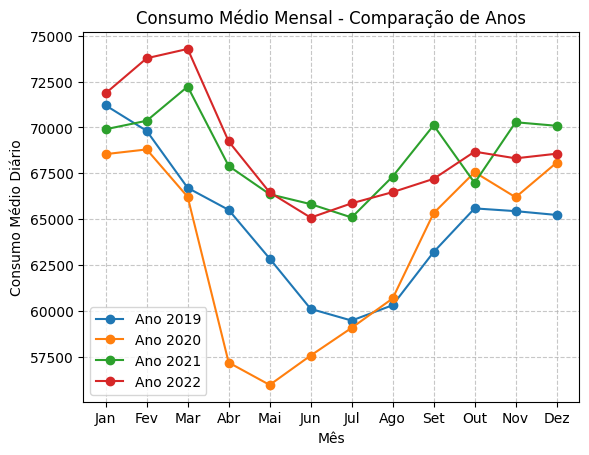

In [38]:
years = [2019, 2020, 2021, 2022]  # Substitua pelos anos que deseja comparar
for year in years:
    year_data = monthly_mean[monthly_mean['year'] == year]
    plt.plot(year_data['month'], year_data['daily_mean_demand'], marker='o', label=f'Ano {year}')

plt.title('Consumo Médio Mensal - Comparação de Anos')
plt.xlabel('Mês')
plt.ylabel('Consumo Médio Diário')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

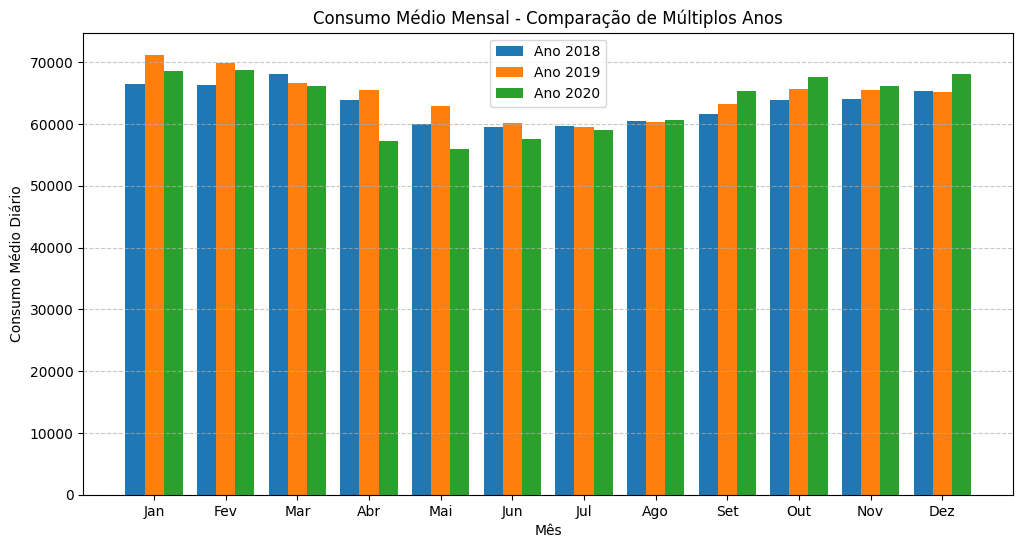

In [39]:
# Lista dos anos a serem comparados
years = [2018, 2019, 2020]  # Adicione os anos desejados aqui

# Dados para os anos selecionados
filtered_data = monthly_mean[monthly_mean['year'].isin(years)]

# Configurar os dados para o gráfico
bar_width = 0.8 / len(years)  # Ajustar a largura das barras com base no número de anos
x = np.arange(1, 13)  # Meses (1 a 12)

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
for i, year in enumerate(years):
    year_data = filtered_data[filtered_data['year'] == year]
    plt.bar(x + i * bar_width, year_data['daily_mean_demand'], width=bar_width, label=f'Ano {year}')

# Configurar o gráfico
plt.title('Consumo Médio Mensal - Comparação de Múltiplos Anos')
plt.xlabel('Mês')
plt.ylabel('Consumo Médio Diário')
plt.xticks(x + (bar_width * (len(years) - 1)) / 2, ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


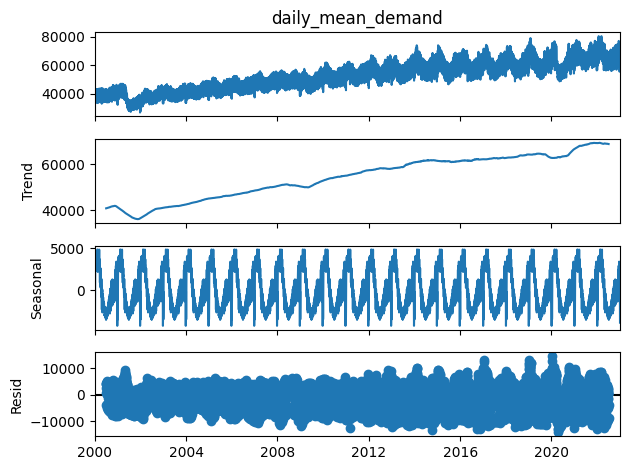

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Certifique-se de que os dados estejam ordenados e no formato datetime
daily_mean.set_index('date', inplace=True)

# Decompor uma série temporal (exemplo: dados de 2018)
result = seasonal_decompose(daily_mean['daily_mean_demand'], model='additive', period=365)
result.plot()
plt.show()


In [41]:
# Recriar daily_mean a partir dos dados originais
data['index'] = pd.to_datetime(data['index'])  # Garantir que está no formato datetime
data['date'] = data['index'].dt.date  # Criar uma coluna com apenas as datas

# Calcular a média diária
daily_mean = data.groupby('date', as_index=False)['hourly_demand'].mean()
daily_mean.rename(columns={'hourly_demand': 'daily_mean_demand'}, inplace=True)

# Garantir que 'date' está no formato datetime
daily_mean['date'] = pd.to_datetime(daily_mean['date'])

# Calcular o consumo total por ano
annual_consumption = daily_mean.groupby(daily_mean['date'].dt.year)['daily_mean_demand'].sum()

# Calcular a taxa de crescimento anual
annual_growth = annual_consumption.pct_change() * 100  # Converte para percentual


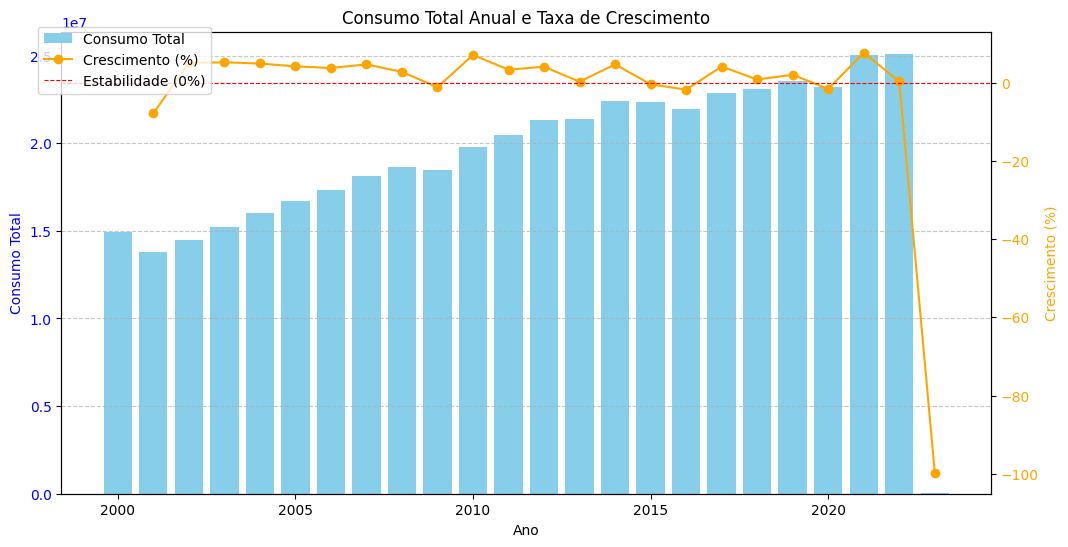

In [42]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para o consumo total anual
ax1.bar(annual_consumption.index, annual_consumption.values, color='skyblue', label='Consumo Total')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Consumo Total', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar o eixo secundário para a taxa de crescimento
ax2 = ax1.twinx()
ax2.plot(annual_growth.index, annual_growth.values, color='orange', marker='o', label='Crescimento (%)')
ax2.set_ylabel('Crescimento (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Estabilidade (0%)')

# Adicionar título e legendas
plt.title('Consumo Total Anual e Taxa de Crescimento')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()


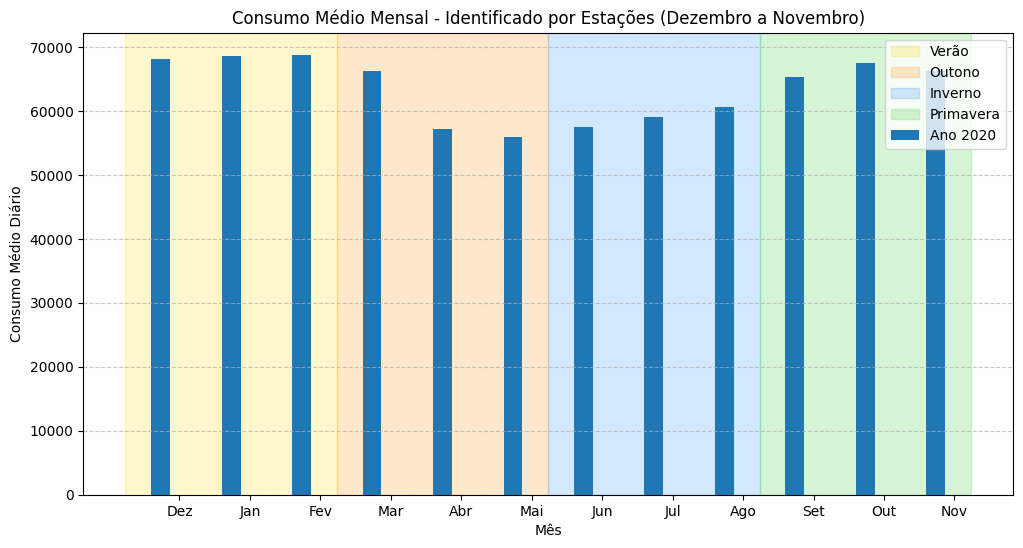

In [43]:
years = [2020]  
# Configurar a ordem dos meses começando em dezembro
month_order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
monthly_mean['month'] = pd.Categorical(monthly_mean['month'], categories=month_order, ordered=True)

# Ordenar o DataFrame pela nova ordem dos meses
monthly_mean = monthly_mean.sort_values('month')

# Definir as cores das estações
season_colors = {
    'Verão': '#FFD700',  # Amarelo
    'Outono': '#FF8C00',  # Laranja
    'Inverno': '#1E90FF',  # Azul
    'Primavera': '#32CD32'  # Verde
}

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Adicionar fundo colorido para as estações
for season in ['Verão', 'Outono', 'Inverno', 'Primavera']:
    months = {
        'Verão': [1, 2, 3],
        'Outono': [4, 5, 6],
        'Inverno': [7, 8, 9],
        'Primavera': [10, 11, 12]
    }[season]
    plt.axvspan(min(months) - 0.5, max(months) + 0.5, color=season_colors[season], alpha=0.2, label=season)

# Plotar os dados para cada ano
for i, year in enumerate(years):
    year_data = monthly_mean[monthly_mean['year'] == year]
    plt.bar(x + i * bar_width, year_data['daily_mean_demand'], width=bar_width, label=f'Ano {year}')

# Ajustar os rótulos do eixo X
plt.xticks(
    x + bar_width, 
    ['Dez', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov']
)

# Configurar o gráfico
plt.title('Consumo Médio Mensal - Identificado por Estações (Dezembro a Novembro)')
plt.xlabel('Mês')
plt.ylabel('Consumo Médio Diário')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\eduar\AppData\Local\Temp\ipykernel_4240\235502318.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'hour'] = filtered_data['index'].dt.hour
C:\Users\eduar\AppData\Local\Temp\ipykernel_4240\235502318.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'hour'] = filtered_data['index'].dt.hour
C:\Users\eduar\AppData\Local\Temp\ipykernel_4240\235502318.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

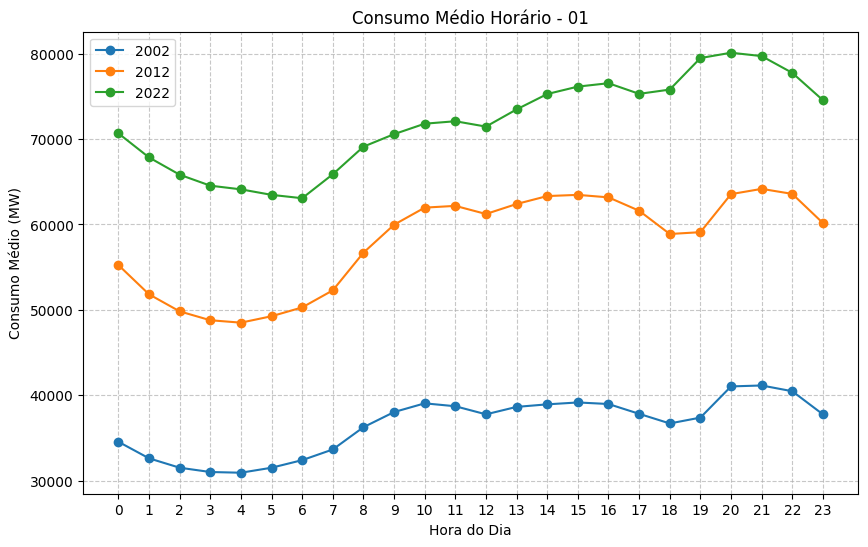

In [44]:
years = [2002, 2012, 2022]
month = 1  # Mês a ser analisado

plt.figure(figsize=(10, 6))

for year in years:
    # Filtrar os dados para o ano e mês específicos
    filtered_data = data[(data['index'].dt.year == year) & (data['index'].dt.month == month)]
    filtered_data.loc[:, 'hour'] = filtered_data['index'].dt.hour

    # Agrupar por hora e calcular a média
    hourly_mean = filtered_data.groupby('hour')['hourly_demand'].mean()

    # Adicionar ao gráfico
    plt.plot(hourly_mean.index, hourly_mean.values, marker='o', label=f'{year}')

# Configurar o gráfico
plt.title(f'Consumo Médio Horário - {month:02d}')
plt.xlabel('Hora do Dia')
plt.ylabel('Consumo Médio (MW)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.show()


In [45]:
import pandas as pd

# Garantir que os dados estão ordenados por data
daily_mean = daily_mean.sort_values('date')

# Preparar a tabela com 30 entradas e 1 saída
window_size = 30
data = []

for i in range(window_size, len(daily_mean)):
    inputs = daily_mean['daily_mean_demand'].iloc[i-window_size:i].values  # Últimos 30 dias
    target = daily_mean['daily_mean_demand'].iloc[i]  # Dia 31
    data.append(list(inputs) + [target])

# Criar DataFrame
columns = [f'day_{i+1}' for i in range(window_size)] + ['target']
neural_net_data = pd.DataFrame(data, columns=columns)

# Exibir as primeiras linhas da tabela
neural_net_data.head()


,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,target
0,30736.529167,31453.354167,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,...,38240.433333,34345.833333,41049.875000,41703.370833,42417.379167,41203.775000,40598.033333,36942.858333,33499.012500,40953.204167
1,31453.354167,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667,...,34345.833333,41049.875000,41703.370833,42417.379167,41203.775000,40598.033333,36942.858333,33499.012500,40953.204167,41924.566667
2,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667,42261.779167,...,41049.875000,41703.370833,42417.379167,41203.775000,40598.033333,36942.858333,33499.012500,40953.204167,41924.566667,42002.120833
3,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667,42261.779167,42554.425000,...,41703.370833,42417.379167,41203.775000,40598.033333,36942.858333,33499.012500,40953.204167,41924.566667,42002.120833,42586.733333
4,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667,42261.779167,42554.425000,42929.404167,...,42417.379167,41203.775000,40598.033333,36942.858333,33499.012500,40953.204167,41924.566667,42002.120833,42586.733333,42888.333333


In [46]:
neural_net_data.shape

(8360, 31)

           day_1     day_2     day_3     day_4     day_5     day_6     day_7  \
day_1   1.000000  0.909143  0.829004  0.806223  0.802628  0.817817  0.886734   
day_2   0.909143  1.000000  0.909083  0.828990  0.806224  0.802636  0.817836   
day_3   0.829004  0.909083  1.000000  0.909042  0.828924  0.806153  0.802576   
day_4   0.806223  0.828990  0.909042  1.000000  0.909044  0.828935  0.806170   
day_5   0.802628  0.806224  0.828924  0.909044  1.000000  0.909061  0.828968   
day_6   0.817817  0.802636  0.806153  0.828935  0.909061  1.000000  0.909082   
day_7   0.886734  0.817836  0.802576  0.806170  0.828968  0.909082  1.000000   
day_8   0.963619  0.886759  0.817782  0.802594  0.806206  0.829005  0.909102   
day_9   0.883141  0.963629  0.886710  0.817774  0.802599  0.806216  0.829018   
day_10  0.811413  0.883099  0.963611  0.886685  0.817741  0.802566  0.806192   
day_11  0.793786  0.811422  0.883018  0.963599  0.886708  0.817791  0.802620   
day_12  0.792587  0.793821  0.811377  0.

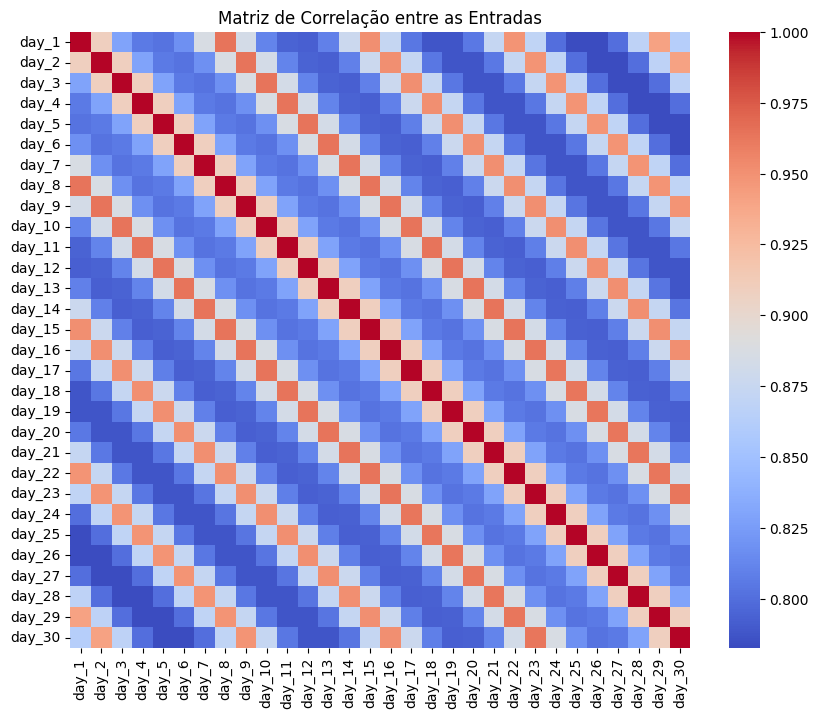

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas de entrada
input_columns = [col for col in neural_net_data.columns if 'day_' in col]
correlation_matrix = neural_net_data[input_columns].corr()

# Visualizar a matriz de correlação como tabela
print(correlation_matrix)

# Visualizar como heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação entre as Entradas')
plt.show()


In [ ]:
# Definir o número de dias mais recentes a serem usados
new_window_size = 7  # Por exemplo, usar apenas os últimos 10 dias

# Recriar a tabela com as novas entradas
data = []

for i in range(new_window_size, len(daily_mean)):
    inputs = daily_mean['daily_mean_demand'].iloc[i-new_window_size:i].values  # Últimos 7 dias
    target = daily_mean['daily_mean_demand'].iloc[i]  # Dia 8
    data.append(list(inputs) + [target])

# Criar novo DataFrame
columns = [f'day_{i+1}' for i in range(new_window_size)] + ['target']
reduced_neural_net_data = pd.DataFrame(data, columns=columns)

# Exibir as primeiras linhas da tabela ajustada
reduced_neural_net_data.head()


,day_1,day_2,day_3,day_4,day_5,day_6,day_7,target
0,30736.529167,31453.354167,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500
1,31453.354167,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333
2,37466.737500,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667
3,39149.970833,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667
4,39961.879167,40674.633333,40604.995833,36854.387500,33546.608333,40613.641667,41951.791667,42261.779167


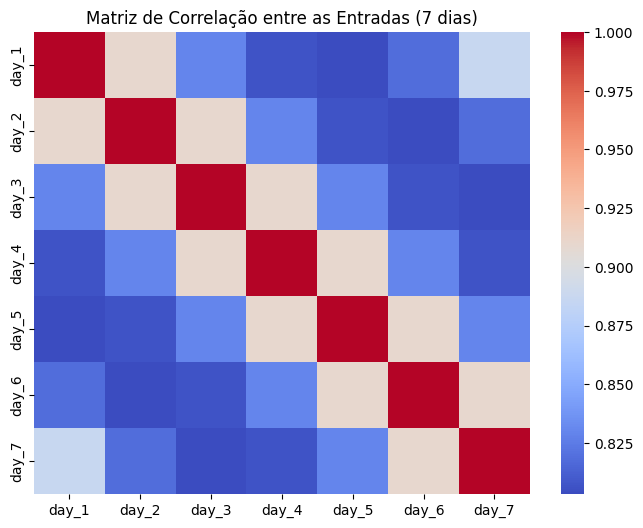

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas de entrada (dias)
input_columns = [col for col in reduced_neural_net_data.columns if 'day_' in col]

# Calcular a matriz de correlação
correlation_matrix = reduced_neural_net_data[input_columns].corr()

# Visualizar a matriz como heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação entre as Entradas (7 dias)')
plt.show()


C:\Users\eduar\AppData\Local\Temp\ipykernel_4240\2875525171.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


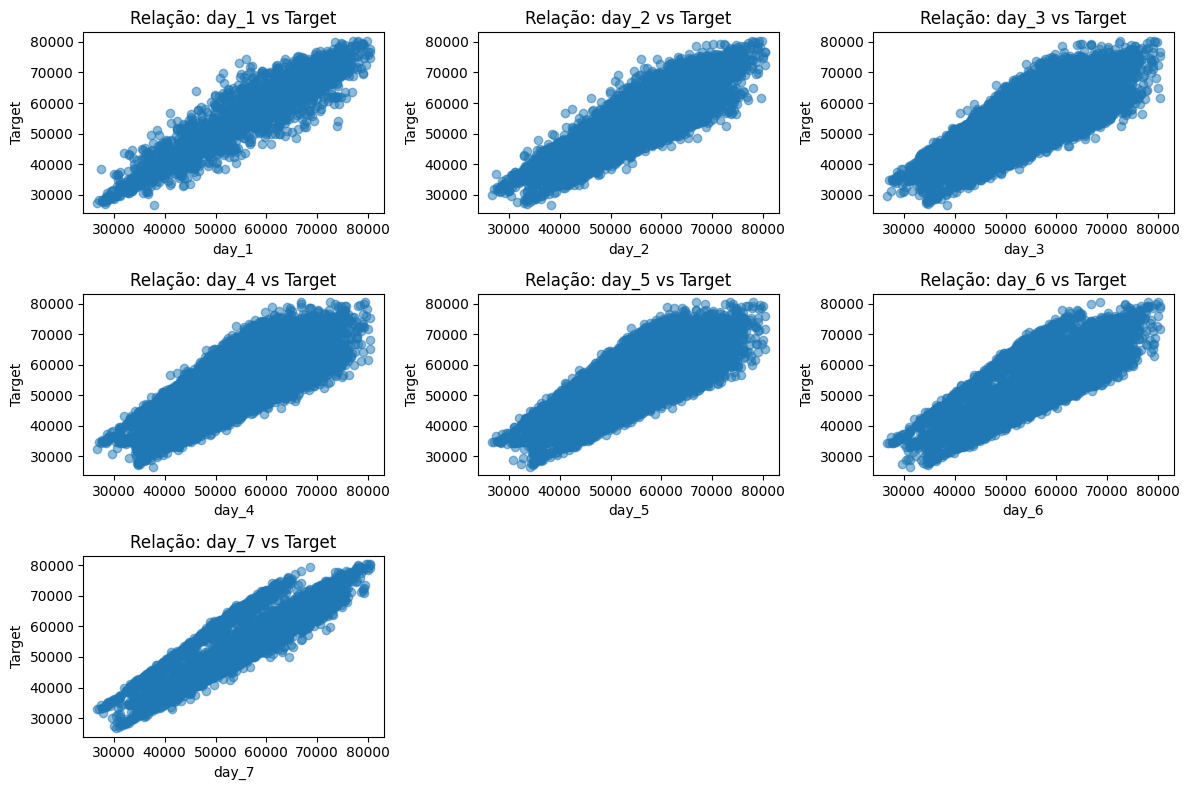

In [55]:
import matplotlib.pyplot as plt

# Criar um gráfico de dispersão para cada entrada
plt.figure(figsize=(12, 8))
for i, column in enumerate([col for col in reduced_neural_net_data.columns if 'day_' in col], start=1):
    plt.subplot(3, 3, i)  # Organizar os gráficos em 3 linhas x 3 colunas
    plt.scatter(reduced_neural_net_data[column], reduced_neural_net_data['target'], alpha=0.5)
    plt.title(f'Relação: {column} vs Target')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.tight_layout()

plt.show()

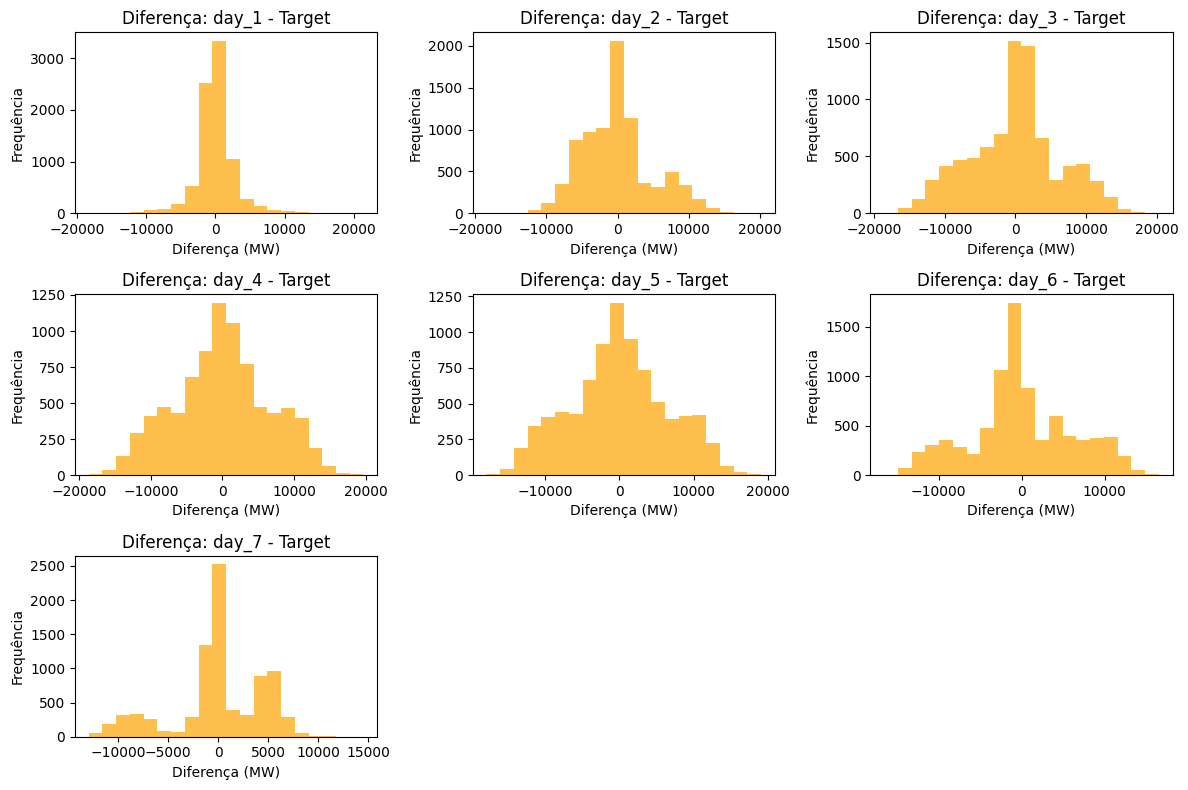

In [58]:
plt.figure(figsize=(12, 8))

# Para cada entrada, calcular e plotar a diferença
for i, column in enumerate([col for col in reduced_neural_net_data.columns if 'day_' in col], start=1):
    plt.subplot(3, 3, i)
    plt.hist(reduced_neural_net_data[column] - reduced_neural_net_data['target'], bins=20, color='orange', alpha=0.7)
    plt.title(f'Diferença: {column} - Target')
    plt.xlabel('Diferença (MW)')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


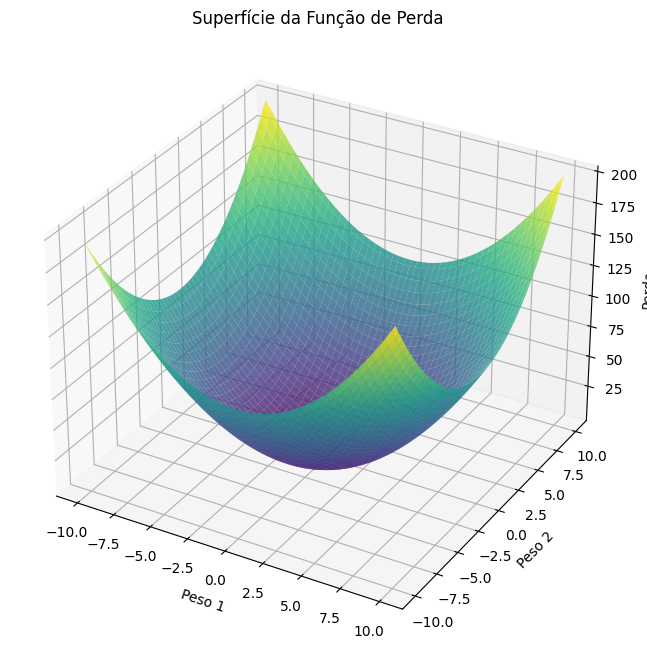

In [53]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Criando uma função de perda simples: z = x^2 + y^2
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Plotar o gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_title('Superfície da Função de Perda')
ax.set_xlabel('Peso 1')
ax.set_ylabel('Peso 2')
ax.set_zlabel('Perda')
plt.show()
